In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
file3 = pd.read_csv(r'file:///Users/kaan/Desktop/Data_Marketing_Customer_Analysis_Round3.csv')
pd.options.display.max_rows = 10



In [238]:
file3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [229]:
numerics = ['int16', 'int32', 'int64'] 
numerical = file3.select_dtypes(include=numerics)
numerical

X = np.array(numerical)

In [230]:
numerical = numerical.dropna()
numerical = numerical.reset_index()
numerical

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809,48029,61,7,52,0,9,292
1,1,2228,92260,64,3,26,0,1,744
2,2,14947,22139,100,34,31,0,2,480
3,3,22332,49078,97,10,3,0,2,484
4,4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...,...
10684,10684,15563,61541,253,12,40,0,7,1214
10685,10685,5259,61146,65,7,68,0,6,273
10686,10686,23893,39837,201,11,63,0,2,381
10687,10687,11971,64195,158,0,27,4,6,618


In [231]:
X= numerical [['customer_lifetime_value', 'income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies']]
y = numerical ['total_claim_amount']

In [232]:
X
y

0         292
1         744
2         480
3         484
4         707
         ... 
10684    1214
10685     273
10686     381
10687     618
10688    1021
Name: total_claim_amount, Length: 10689, dtype: int64

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state = 42)
print("X_train", X_train.shape)

X_train (7482, 7)


In [234]:
y = np.array(file3["total_claim_amount"]).reshape(-1,1)

In [252]:
pt = PowerTransformer(method='yeo-johnson')
pt.fit(X_train)
X_train_transformed = pt.transform(X_train)
X_test_transformed = pt.transform(X_test)

pt.fit(y_train)
y_train_transformed = pt.transform(y_train)
y_test_transformed = pt.transform(y_test)

In [253]:
#lm = LinearRegression()
#numerical = lm.fit(X_train_scaled, y_train)
#numerical.coef_


lm = LinearRegression()
numerical = lm.fit(X_train_transformed,y_train_transformed)
print("Slope =", numerical.coef_)
print("Intercept =", numerical.intercept_)

Slope = [[-2.08480481e-02 -1.43758190e-01  4.96258343e-01 -9.76148844e-05
  -5.65452562e-03 -2.11877522e-02  1.97560397e-02]]
Intercept = [-2.98780762e-14]


In [237]:
numerical.intercept_

array([4.15990575e-14])

In [181]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [228]:
y_pred = numerical.predict(X_test)
y_test - y_pred

/Users/kaan/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[11465.92072078],
       [ 7414.23147589],
       [10879.94171342],
       ...,
       [ 3371.89147786],
       [ 6199.06598647],
       [15898.25522554]])

In [225]:
mse(y_test,y_pred)

TypeError: 'numpy.float64' object is not callable

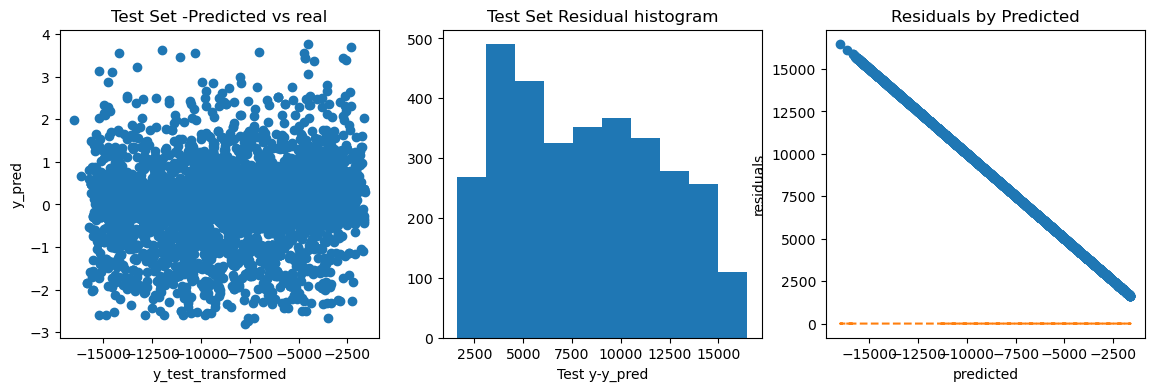

In [211]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test_transformed, 'o')
ax[0].set_xlabel("y_test_transformed")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test_transformed - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test_transformed - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

### Thursday

In [212]:
import pandas as pd
# Define the data
column_names = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
                'months_since_last_claim', 'months_since_policy_inception',
                'number_of_open_complaints', 'number_of_policies']
coef_values = [-2.13594719, -36.7201968 , 161.12276203,   3.5527067 ,
         -2.03301237,  -1.17714444,   1.58807445]
# Create the DataFrame
data_coef_rank = pd.DataFrame({'column_name': column_names, 'coef': coef_values})
# Display the DataFrame
data_coef_rank

,column_name,coef
0,customer_lifetime_value,-2.135947
1,income,-36.720197
2,monthly_premium_auto,161.122762
3,months_since_last_claim,3.552707
4,months_since_policy_inception,-2.033012
5,number_of_open_complaints,-1.177144
6,number_of_policies,1.588074


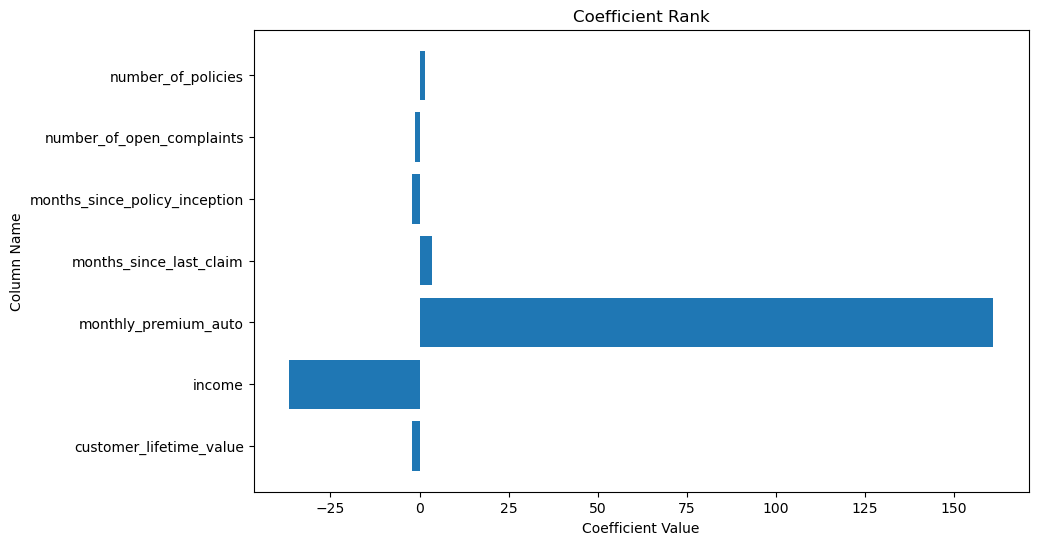

In [213]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the horizontal bar chart
plt.barh(data_coef_rank['column_name'], data_coef_rank['coef'])

# Set the axis labels and title
plt.xlabel('Coefficient Value')
plt.ylabel('Column Name')
plt.title('Coefficient Rank')

# Display the chart
plt.show()


In [257]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
mse = mse(y_test_transformed,y_pred)
print("MSE =",mse)

MSE = 0.7637981044286775


In [201]:
mae = mae(y_test_transformed,y_pred)
print("MAE =",mae)

MAE = 8168.231230775853


In [203]:
import math

In [204]:
RMSE = math.sqrt(mse)
print("RMSE =",RMSE)

RMSE = 9035.23701101124


In [205]:
r2 = r2(y_test_transformed,y_pred)
print("R2 =",r2)

R2 = -84775482.55317543


In [241]:
file3

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [243]:
file3 = file3.reset_index()
file3.head()

,index,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


In [244]:
y = np.array(file3["total_claim_amount"]).reshape(-1,1)

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 100)

In [247]:
pt = PowerTransformer(method='yeo-johnson')
pt.fit(X_train)
X_train_transformed = pt.transform(X_train)
X_test_transformed = pt.transform(X_test)

In [246]:
pt.fit(y_train)
y_train_transformed = pt.transform(y_train)
y_test_transformed = pt.transform(y_test)

In [249]:
lm = LinearRegression()
model = lm.fit(X_train_transformed,y_train_transformed)
print("Slope =", model.coef_)
print("Intercept =", model.intercept_)

Slope = [[-2.08480481e-02 -1.43758190e-01  4.96258343e-01 -9.76148844e-05
  -5.65452562e-03 -2.11877522e-02  1.97560397e-02]]
Intercept = [-2.98780762e-14]


In [250]:
y_pred = model.predict(X_test_transformed)
compare = pd.DataFrame({'y_test':list(y_test_transformed) ,'y_pred': list(y_pred)})
compare

,y_test,y_pred
0,[-0.24396624958434066],[-0.5329755038427556]
1,[0.26434240768752915],[0.43784774727757897]
2,[-2.217679240628924],[0.40376159507645204]
3,[-1.3251063471108266],[0.014589861264761257]
4,[1.7008351797377181],[0.9718752095469454]
...,...,...
3202,[0.22065479805990468],[-0.9183327212290072]
3203,[0.2409017326320982],[0.6686653167342367]
3204,[2.2392343647745285],[1.1509166638082804]
3205,[-1.5646410368808357],[-0.8757387844982374]


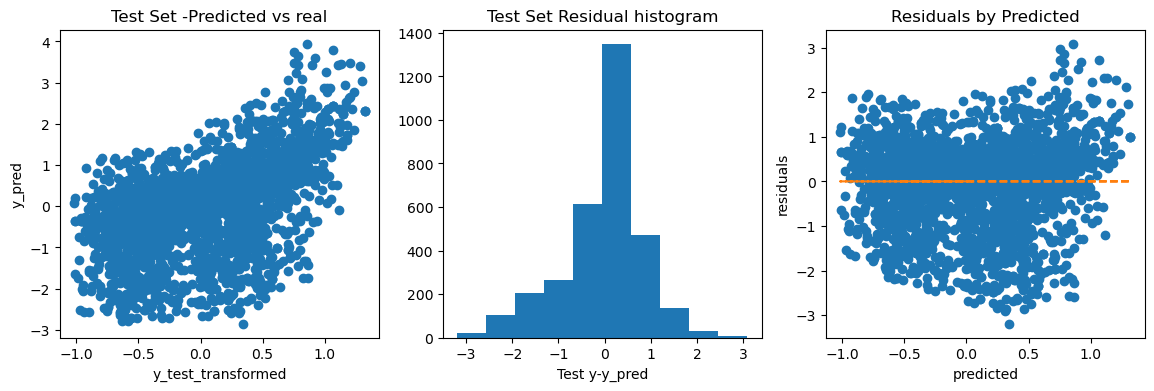

In [251]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test_transformed, 'o')
ax[0].set_xlabel("y_test_transformed")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test_transformed - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test_transformed - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [266]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
mse = mse(y_test_transformed,y_pred)
print("MSE =",mse)

MSE = 0.7637981044286775


In [267]:
mae = mae(y_test_transformed,y_pred)
print("MAE =",mae)

MAE = 0.6295226660494436


In [268]:
RMSE = math.sqrt(mse)
print("RMSE =",RMSE)

RMSE = 0.8739554361800591


In [269]:
r2 = r2(y_test_transformed,y_pred)
print("R2 =",r2)

R2 = 0.2630439296055753


### optional question

In [298]:
#I made a copy of my file 
file3_copy = file3.copy()
summary= file3_copy.describe()
summary

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000
mean,5344.000000,8011.906727,51750.243989,93.190196,15.144073,48.100571,0.384975,2.980821,434.227243
std,3085.792848,6877.557889,24778.053035,34.413111,10.086110,27.934300,0.910210,2.399497,292.550878
min,0.000000,1898.000000,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2672.000000,4014.000000,29335.000000,68.000000,6.000000,24.000000,0.000000,1.000000,269.000000
50%,5344.000000,5776.000000,50398.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.000000
75%,8016.000000,8991.000000,72131.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.000000
max,10688.000000,83325.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.000000


In [299]:
import pandas as pd
from scipy.stats import mstats



In [304]:
column_to_winsorize = 'customer_lifetime_value'

# Apply Winsorization to the specified column
winsorized_values = mstats.winsorize(file3_copy[column_to_winsorize], limits=[0.01, 0.01])
file3_copy[column_to_winsorize] = winsorized_values
file3_copy

,index,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2230,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize
